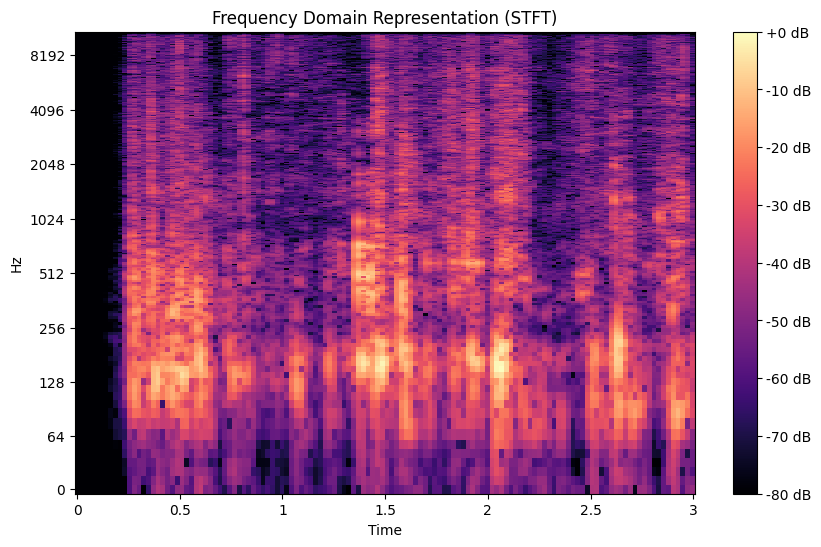

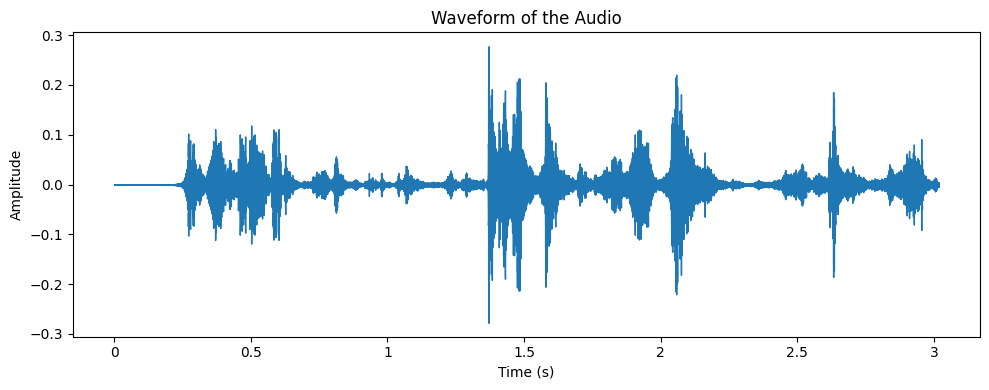

In [98]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load the MP3 audio file
audio_file = "./test/cardboard1.mp3"
y, sr = librosa.load(audio_file)

# Calculate the Short-Time Fourier Transform (STFT)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 6))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Frequency Domain Representation (STFT)')
plt.show()

# Create a time array for the waveform
time = librosa.times_like(y, sr=sr)

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of the Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


In [99]:
def process_plot(file):
    audio_file = file
    y, sr = librosa.load(audio_file)
    # waveforms(y , sr)
    # spectrogram(y, sr)
    spectrum(y, sr)
    mel_spec(y,sr)
def waveforms(y, sr):

    plt.figure(figsize=(6, 1.8))
    plt.plot(y, color='gray')   
    plt.title("Waveform")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.show()
    plt.figure(figsize=(6, 1.8))
    librosa.display.waveshow(y, sr=sr, color='gray')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.tight_layout()

def spectrogram(y, sr):
    N, H = 2048, 1024
    X = librosa.stft(y, n_fft=N, hop_length=H, win_length=N)
    Y = np.abs(X)
    print('Shape of spectrogram:', Y.shape)

    plt.figure(figsize=(8, 3))
    librosa.display.specshow(librosa.amplitude_to_db(Y, ref=np.max), 
                            y_axis='linear', x_axis='time', sr=sr, hop_length=H, cmap='gray_r')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(6, 1.8))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Spectrogram")
    plt.show()

def spectrum(y, sr):

    window_length = 5
    box_filter = np.ones(window_length) / (window_length)
    y = np.convolve(y, box_filter, mode='same')
    fft = np.fft.fft(y)
    magnitude = np.abs(fft)
    frequency = np.fft.fftfreq(len(magnitude), 1/sr)
    plt.figure(figsize=(6, 1.8))
    plt.plot(frequency[:len(frequency)//2], magnitude[:len(frequency)//2])
    plt.title("Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(0, 10000)  
    plt.show()
    print(np.abs(frequency[np.abs(np.argmax(magnitude))]))

def mel_spec(y, sr):
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert the power spectrogram to dB scale (decibels)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    print(np.shape(mel_spectrogram_db))

    mel_spectrogram_normalized = np.uint8(((mel_spectrogram_db+80.0)*255.0)/80.0)
    print(mel_spectrogram_normalized[0])
    ref = np.zeros(np.shape(mel_spectrogram_normalized))
    print(np.shape(ref))
    mel_spectrogram_normalized = cv2.merge((ref, ref, ref))
    cv2.imwrite("output.png", mel_spectrogram_normalized)
    # Plot the Mel spectrogram
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr, cmap='viridis')
    plt.colorbar(format='%+2.0f dB')    
    plt.title('Mel Spectrogram')
    plt.show()
    plt.savefig("output.png", format='png')
    # output_image_path = "mel_spectrogram.png"  # Set the desired output image path
    # mel_spectrogram_normalized = cv2.normalize(mel_spectrogram_db, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    # mel_spectrogram_normalized = cv2.merge((mel_spectrogram_normalized, mel_spectrogram_normalized, mel_spectrogram_normalized))
    # mel_spectrogram_normalized[0] = 0
    # mel_spectrogram_normalized[2] = 0
    # cv2.imwrite(output_image_path, mel_spectrogram_normalized)

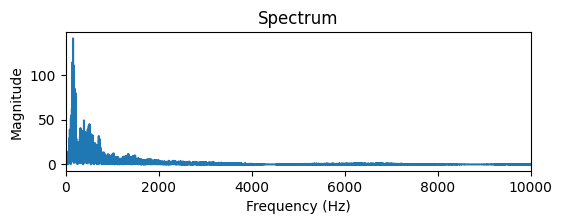

159.0335376848179
(128, 130)
[  0   0   0   0   0   0   0   0   0   0  30  78  90  90  89  74  94 117
 106  98 116 125 125  98  88 116 119 111  89  69  40  80 114 124 107 100
  99  74  43  19  39  54  44  35  32  85 107  91  75  60  39  42  73  83
  85  70  52  47  76 121 127  99 118 130 129 103  75  99 122 119 106  89
  84  82  77  66  71  61  84 107 104  83  86 106 113  98  82 149 160 143
 128 109  93 107 113 104  94 103  99  83  81  93  95  78  54  44  46  99
 132 124  84  90 125 143 135 121 116 107  90 101  83  35  22  71 127 146
 128  86  93  86]
(128, 130)


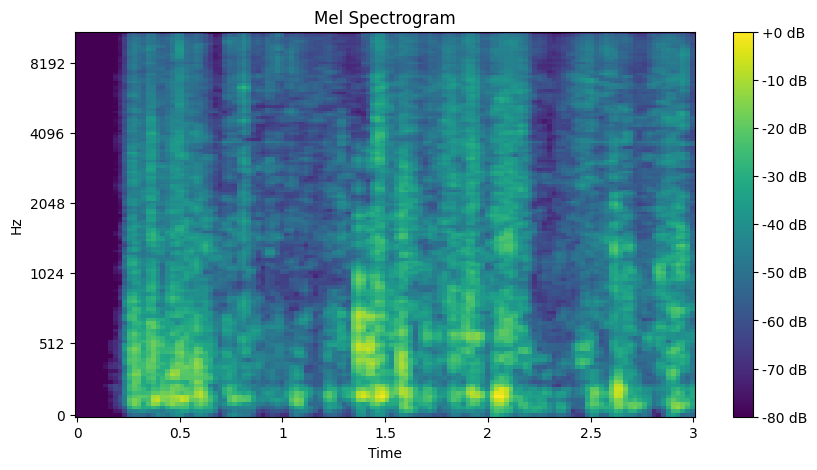

<Figure size 640x480 with 0 Axes>

In [100]:
process_plot("./test/cardboard1.mp3")

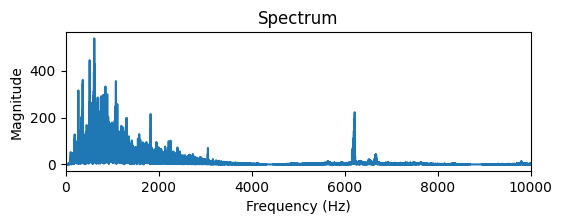

618.5741976199063
(128, 130)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  33  35  14  13
  16   3   4  22  27   6   0  19  48  86 106 104  76  81  80  79  66  90
 101  86  53  43  25  10  12  21  20  38  79  98  98 102  97 106 100  94
 102 115 123 105  96  84  48  61  74  72  79  92  78  89  90  88  81  75
  86  80  67  61  86  85  62  69  60  65  75  81  83  87 106 104  81  81
  79  78  87  77  52  48  88  94  73  94  97  91  86  88  72  55  44  43
  30  21   6  11   0   0   0   0   0   6   1  28  39  77  98 102  97  94
  80  84  86  82]
(128, 130)


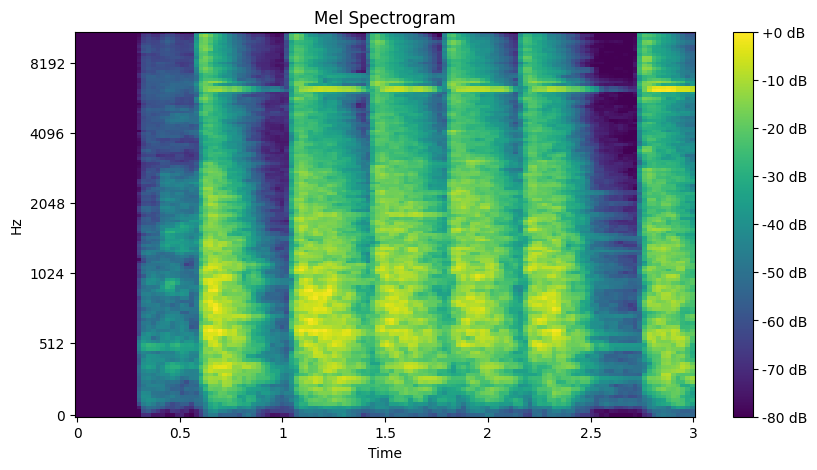

<Figure size 640x480 with 0 Axes>

In [101]:
process_plot("./test/metal_banging1.mp3")

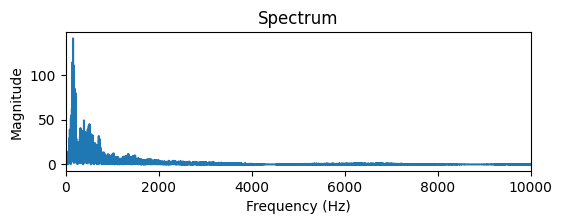

159.0335376848179
(128, 130)
[  0   0   0   0   0   0   0   0   0   0  30  78  90  90  89  74  94 117
 106  98 116 125 125  98  88 116 119 111  89  69  40  80 114 124 107 100
  99  74  43  19  39  54  44  35  32  85 107  91  75  60  39  42  73  83
  85  70  52  47  76 121 127  99 118 130 129 103  75  99 122 119 106  89
  84  82  77  66  71  61  84 107 104  83  86 106 113  98  82 149 160 143
 128 109  93 107 113 104  94 103  99  83  81  93  95  78  54  44  46  99
 132 124  84  90 125 143 135 121 116 107  90 101  83  35  22  71 127 146
 128  86  93  86]
(128, 130)


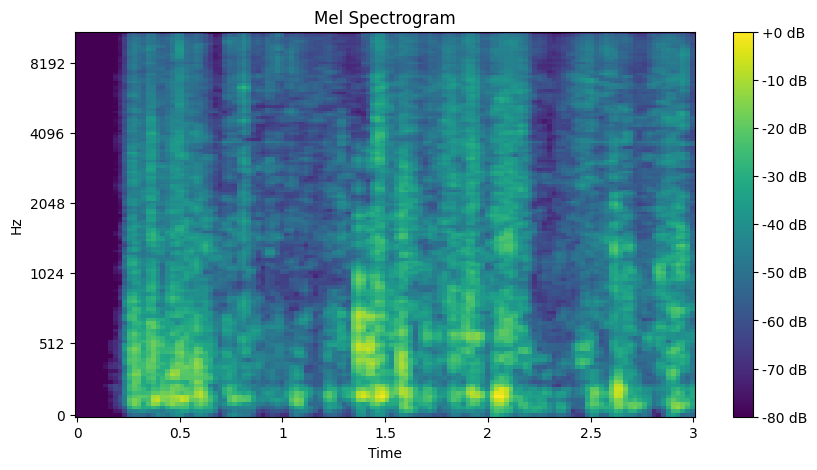

<Figure size 640x480 with 0 Axes>

In [102]:
process_plot("./test/cardboard2.mp3")

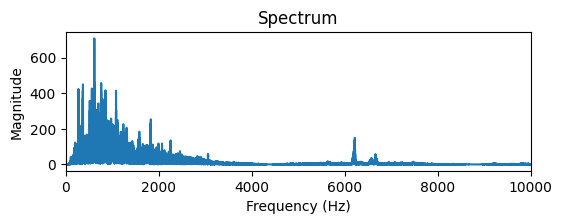

617.2489181391994
(128, 130)
[  0  24  48  51  42  47  51  93 108 107 105 114 104  96  95 100  85  76
  84  91  76  87  83  92 105  98  99  92 108 107  88  96  97  84  62  68
  66  78 101  98  84  72  90 105 105 108  92  91  96  98  94  86  73  45
  57  65  59  60  72 103 107  90  95  94 117 111  92  80  60  57  52  66
  70  81  88  85  87  84  88  91  91  78  63  64  75  57  39  48  43  48
  32  24  54  75  76  87  91 106 111 112  95  76  59  58  69  50  36  37
  31  21  13   7   3   8   5  45  67  68  55  92 107 105 102  80  95  98
  87  68  53  66]
(128, 130)


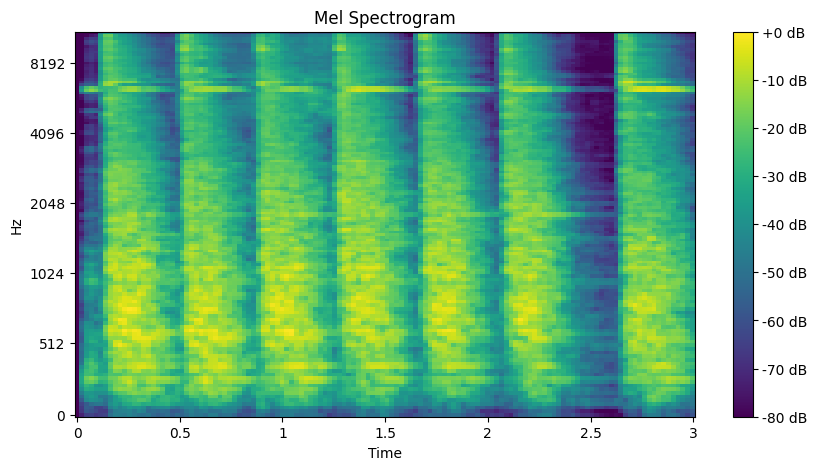

<Figure size 640x480 with 0 Axes>

In [103]:
process_plot("./test/metal_banging2.mp3")

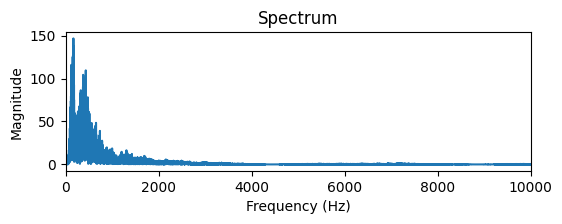

166.65389469888208
(128, 130)
[  0   0  71 136 146 132 112  86  57  21   0   0   0   0   0   0   0   0
   0   0   0   0   6  37  85 102  90  64  71  90  93 101  99  77  62  28
  43  39  47  43  24   0   8  17  10  37  85 137 146 125 105  93  93  71
  56  69  61  57  58  54  26   7  74  98  92  57  51  63  57  44  85  94
 126 131  99  82  92 136 142 134 122  75  62  59  80 137 147 131 134 126
  92  60  60  49  62  68 113 131 114  96  69  75 107 117 106  95  72  58
  67  77  98 106 109 104  86  68  68  77  56  61 111 117  87  57  56  82
 103 108 123 124]
(128, 130)


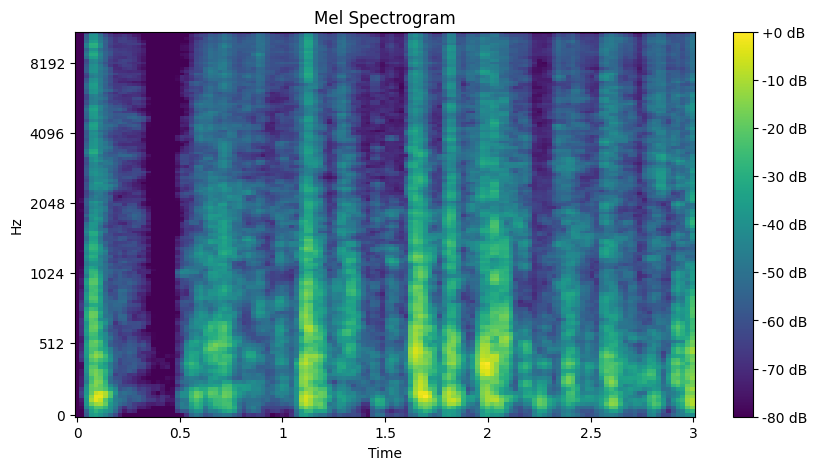

<Figure size 640x480 with 0 Axes>

In [104]:
process_plot("./test/cardboard8.mp3")

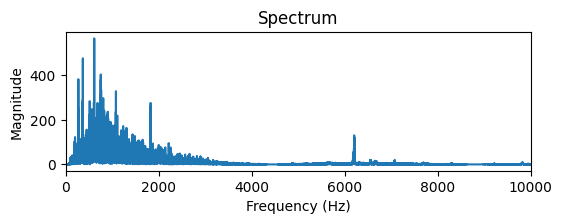

617.5802380093761
(128, 130)
[  0  15  52  92  96 100  95  87  96  81  77  83  82 100 104  86  84  89
  80  72  68  53  45  43  42  45  43  39  22  16  27  21   0   2   0   8
  14   2   0  15  32  38  22   0   0   0   0   0   0   1  66  97  98  86
  82  81 115 120 105 108 114 108  91  89  82  75  63  78  75  85  91  83
  79 106 112  96  90  76  97  95  81  81  86  78  45  59  65  77  72  78
  81  93 102  88  85  89  83  77  58  75  80  65  64  69  60  61  71  56
  34  22   2   0   0  11   1   8   2   3   1   8   0   0   0   0   0   0
   0   0   0  19]
(128, 130)


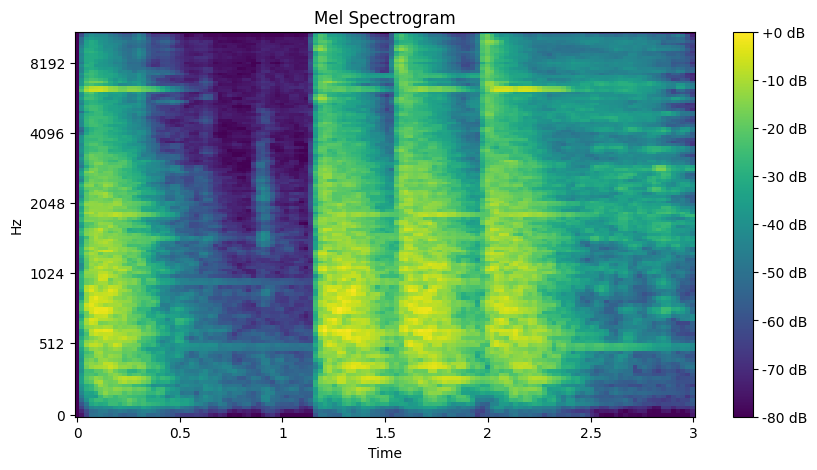

<Figure size 640x480 with 0 Axes>

In [105]:
process_plot("./test/metal_banging11.mp3")